Resources:
 - https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [1]:
import pandas as pd
import re
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize 
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Functions

In [2]:
def preprocess(lyrics):
    # Ignore case
    lyrics = lyrics.lower()
    
    # Remove ',!?:. \n
    lyrics = ''.join([word.strip(",!?:") for word in lyrics])
    lyrics = lyrics.replace('\n', ' ')
    lyrics = lyrics.replace('\'', '')
    
    # Remove everything between hard brackets
    lyrics = re.sub(pattern="[\(\[].*?[\)\]]", repl='', string=lyrics)

    # Remove x4 and (x4), for example
    lyrics = re.sub(pattern="(\()?x\d+(\))?", repl=' ', string=lyrics)

    return(lyrics)

In [3]:
def loadData(file_name, sub_list=False):
    df = pd.read_csv(file_name)
    if sub_list == True:
        #import only 1000 data points because my laptop SUCKS
        df = df.head(5000)
    # Clean data
    df = df.dropna()
    for i, row in df.iterrows():
        df.loc[i,'lyrics'] = preprocess(df.loc[i,'lyrics'])
    return df

In [4]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Main

In [5]:
df = loadData('lyrics.csv', True)

In [6]:
df.head()

index             song  year           artist genre  \
0      0        ego-remix  2009  beyonce-knowles   Pop   
1      1     then-tell-me  2009  beyonce-knowles   Pop   
2      2          honesty  2009  beyonce-knowles   Pop   
3      3  you-are-my-rock  2009  beyonce-knowles   Pop   
4      4    black-culture  2009  beyonce-knowles   Pop   

                                              lyrics  
0  oh baby how you doing you know im gonna cut ri...  
1  playin everything so easy its like you seem so...  
2  if you search for tenderness it isnt hard to f...  
3  oh oh oh i oh oh oh i  if i wrote a book about...  
4  party the people the people the party its popp...

In [7]:
genres = list(set(df['genre']))
print(genres)

['Folk', 'Hip-Hop', 'Pop', 'Rock', 'R&B', 'Electronic', 'Metal', 'Indie', 'Country', 'Jazz', 'Not Available', 'Other']


In [8]:
lyrics = df['lyrics']

### WordCloud

In [9]:
wordclouds = {}
for genre in genres:
    all_words = ','.join(list(df[df['genre'] == genre]['lyrics'].values))
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
    wordcloud.generate(all_words)
    wordclouds[genre] = wordcloud.to_image()

Hip-Hop


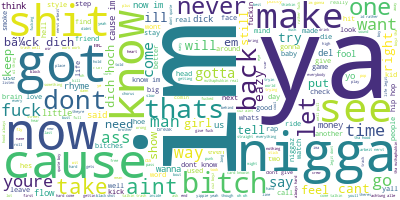

In [10]:
print(genres[1])
wordclouds[genres[1]]

Rock


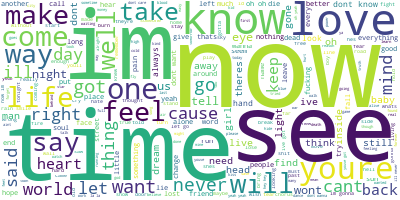

In [11]:
print(genres[3])
wordclouds[genres[3]]

### CountVectorizer

In [12]:
count_vectorizer = CountVectorizer()
lyrics_data1 = count_vectorizer.fit_transform(df['lyrics'])

### Word2Vec

In [13]:
# lyrics_data2 = []
# for i in range(len(lyrics)):
#     for sent in sent_tokenize(lyrics.iloc[i]):
#         tmp = []
#         for word in word_tokenize(sent):
#             tmp.append(word)
#         lyrics_data2.append(tmp)

In [14]:
# word2vec = Word2Vec(lyrics_data2, min_count = 1, size = 100, window = 5) 

In [15]:
# test = []
# for i in count_vectorizer.get_feature_names():
#     try:
#         test.append(word2vec.wv[i])
#     except:
#         pass

In [16]:
# lda.fit(test)

### LDA

[1] CountVectorizer

In [17]:
number_topics = 20
number_words = 10

In [18]:
lda = LDA(n_components=number_topics)
lda.fit(lyrics_data1)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [19]:
print_topics(lda, count_vectorizer, number_words)


Topic #0:
of the will its over we never and be until

Topic #1:
the whoa in its here was oh to night her

Topic #2:
you to the me and my it im your dont

Topic #3:
the and in of we to for they my all

Topic #4:
que no de tu la me el te lo se

Topic #5:
da hallelujah yippie yeah un achtung me alle flawless vuelve

Topic #6:
you the and to me she that it on be

Topic #7:
the to of and in my is your you will

Topic #8:
the we to and all for muthaphukkin gettin niggaz real

Topic #9:
dem and di mi fi the ah nuh up like

Topic #10:
in girls miss up get put on ha who skin

Topic #11:
di mi yuh non gyal il che pon per un

Topic #12:
ah ou und rou les onto glory fuck to on

Topic #13:
oh it the shake and up you your ooh rock

Topic #14:
you the it and im on to my like up

Topic #15:
la run girls who world summertime this le che non

Topic #16:
you me your the to my be love baby can

Topic #17:
the to in me and my that shit he on

Topic #18:
dich ich und die du hoch der bã¼ck wir es

Topic #19